In [ ]:
import torch
t = torch.tensor([1, 2, 3, 4], dtype=torch.long).unsqueeze(dim=1)
print(t.shape)
lst = []
for i in range(4):
  lst.append(t[i].to(torch.uint8))

tr = torch.stack(lst).reshape(-1, 2)
print(tr)
print(tr.dtype)
print(tr.view(torch.int32))

In [ ]:
print(f'{1255:64b}')

In [ ]:
for i in range(8):
  print((t[0][0] >> (8 * (8 - i - 1))).to(torch.uint8))

In [ ]:
import torch
t = torch.tensor([[5, 7,  6, 2, 1, 2, 3, 4, 5, 7,  6, 2, 1, 2, 3, 4],
        [4, 7,  8, 3, 5, 6, 7, 8, 5, 7,  6, 2, 1, 2, 3, 4],
        ], dtype=torch.int8)

t.view(torch.int64)

In [ ]:
0010000001100000011100000101
0101000001110000011000000010

In [ ]:
t = torch.tensor([[5, 7,  6, 2, 1, 2, 3, 4, 5, 7,  6, 2, 1, 2, 3, 4],
        [4, 7,  8, 3, 5, 6, 7, 8, 5, 7,  6, 2, 1, 2, 3, 4],
        ], dtype=torch.int8).reshape(-1, t.shape[-2], 8)

t = t.to(dtype=torch.int64)
print(t)
for i in range(1, 9):
  t[:, :, -i] = t[:, :, -i] << ((8 - i) * 8)
  if i == 1:
    continue
  t[:, :, -1] |= t[:, :, -i]

t = t[:, :, -1]
t

In [ ]:
t = torch.tensor([[1255, 1779,  365, 123, 124, 156],
        [1494, 1577,  378, 123, 167, 34],
        ], dtype=torch.int32)

t.view(torch.int64)

In [ ]:
t = torch.tensor([[1255, 1779,  365],
        [1494, 1577,  378],
        ])
t_long = t.long().unsqueeze(-1)

for i in range(8):
  tmp = (t_long[:,:,0] >> (8 * (8 - i - 1))).to(torch.uint8).unsqueeze(-1)
  t_long = torch.cat([t_long, tmp], dim=-1)

res = t_long[:, :, 1:]
res.reshape(-1, 2, 8).shape

In [ ]:
t = torch.tensor([[1255, 1779,  365],
        [1494, 1577,  378],
        ], dtype=torch.long)

t.long().view(torch.uint8).reshape(-1, 2, 8).shape

In [ ]:
number = 6
import numpy as np
print(f'{(number >> 1):08b}')  # Output: '00000110'


In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [ ]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    transform = torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
  )

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform = torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
)

In [ ]:
len(train_data), len(test_data), train_data[0][0].shape

(60000, 10000, torch.Size([1, 28, 28]))

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image, label= train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Ankle boot')

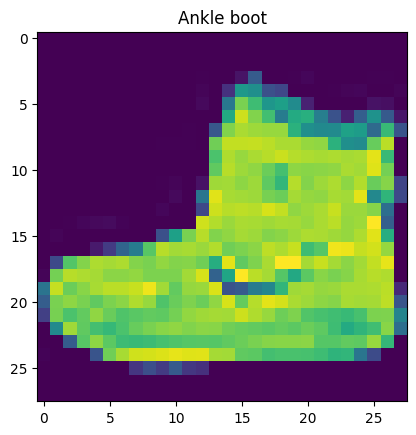

In [ ]:
plt.imshow(image.permute(1, 2, 0))
plt.title(train_data.classes[label])

(-0.5, 27.5, 27.5, -0.5)

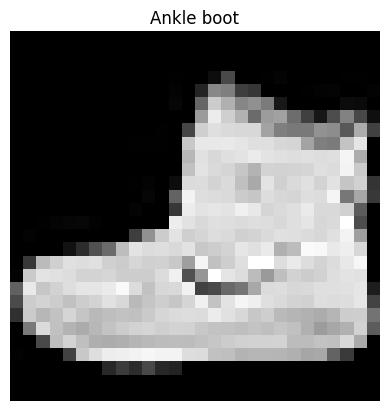

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(train_data.classes[label])
plt.axis(False)

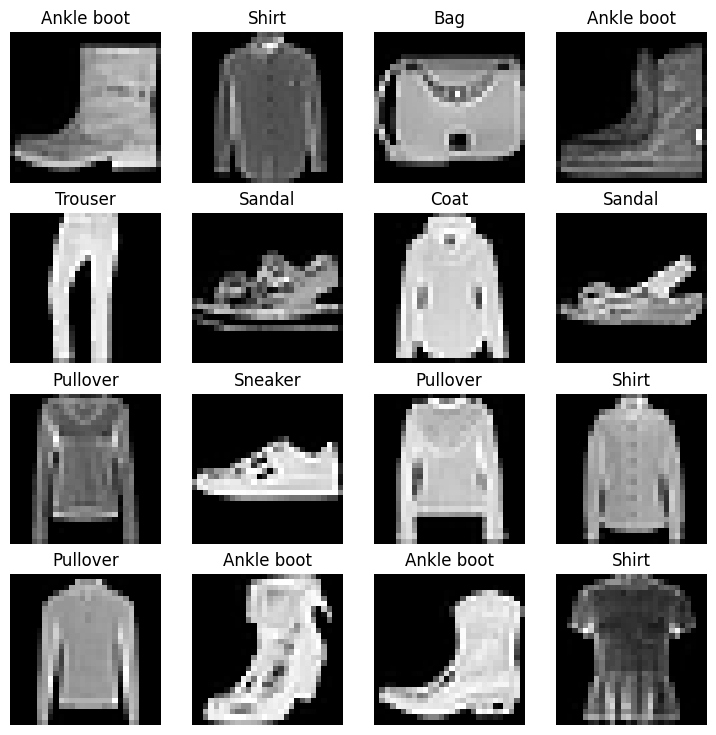

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols=4, 4

for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(train_data.classes[label])
  plt.axis(False)


In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78d945329960>,
 <torch.utils.data.dataloader.DataLoader at 0x78d945329120>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
train_features_batch, train_label_batch = next(iter(train_dataloader))

train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

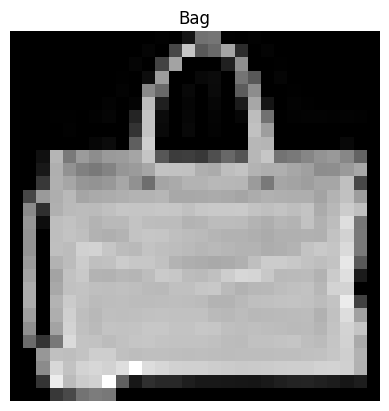

In [ ]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(train_data.classes[label])
plt.axis(False)

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

output[:, :5]

tensor([[0., 0., 0., 0., 0.]])

In [ ]:
output.shape

torch.Size([1, 784])

In [ ]:
flatten_model(t).shape

torch.Size([2, 4])

In [ ]:
t = torch.tensor([[[1, 2],
                 [3, 4]],
            [[5, 6],
                    [7, 8]]])

t.shape

torch.Size([2, 2, 2])

In [ ]:
torch.flatten(t, start_dim=0, end_dim=1)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.layers_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
    )

  def forward(self, x):
    return self.layers_stack(x)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
def acc_fn(y_pred_c, y_labels):
  total = torch.eq(y_pred_c, y_labels).sum().item()
  return total / len(y_labels)

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('Downloaded already')
else:
  print('Downloading...')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

Downloading...


In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    output_shape=len(train_data.classes),
    hidden_units=10,
)

model_0.to(device)

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time: .3f} seconds')
  return total_time

In [ ]:
from tqdm.auto import tqdm # progress bar

In [ ]:
len(next(iter(train_dataloader)))

2

In [ ]:
next(iter(train_dataloader))[0].shape

torch.Size([32, 1, 28, 28])

In [ ]:
next(iter(train_dataloader))[1].shape

torch.Size([32])

In [ ]:
epochs = 3

torch.manual_seed(42)
start_time = timer()

start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n------')
  train_loss = 0

  for i, batch in enumerate(train_dataloader):
    images = batch[0].to(device)
    labels = batch[1].to(device)

    model_0.train()
    preds_logits = model_0(images)
    loss = loss_fn(preds_logits, labels)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 400 == 0:
      print(f'Looked at {(i) * len(images)} / {len(train_dataloader.dataset)} samples')

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      preds = model_0(X.to(device))
      #print(X.device)
      preds_probs = torch.softmax(preds, dim=1).argmax(dim=1).squeeze()
      loss = loss_fn(preds, y.to(device))
      test_loss += loss
      test_acc += acc_fn(preds_probs, y.to(device))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'Train loss: {train_loss} | Test loss: {test_loss} | Test acc: {test_acc * 100}')

end_time = timer()

print_train_time(start_time, end_time, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.5903891921043396 | Test loss: 0.5095351934432983 | Test acc: 82.03873801916933
Epoch: 1
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.4763319790363312 | Test loss: 0.47989001870155334 | Test acc: 83.19688498402556
Epoch: 2
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.4550333023071289 | Test loss: 0.47663894295692444 | Test acc: 83.42651757188499
Train time on cuda:  45.012 seconds


45.011690901000065

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn):

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(dataloader):
      X, y = X.to(device), y.to(device)
      preds = model(X)
      loss += loss_fn(preds, y)
      preds_classes = torch.softmax(preds, dim=1).argmax(dim=1)
      acc += acc_fn(preds_classes.squeeze(), y)

    loss /= len(dataloader)
    acc /= len(dataloader)

    return {
        'model_name': model.__class__.__name__,
        'model_loss': loss,
        'model_acc': acc * 100
    }




In [ ]:
eval_model(model_0, test_dataloader, loss_fn, acc_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': tensor(0.4766, device='cuda:0'),
 'model_acc': 83.42651757188499}

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_features: int,
               hidden_units: int,
               output_features: int):
    super().__init__()
    self.layers_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layers_stack(x)

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(28 * 28, 10, 10)
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr= 0.1)

def acc_fn(preds_c, labels):
  return (torch.count_nonzero(preds_c == labels) / len(labels)) * 100

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn,
               optimizers: torch.optim.Optimizer,
               device: torch.device=device):

  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in tqdm(enumerate(data_loader)):
    X, y = X.to(device), y.to(device)

    preds = model(X)
    loss = loss_fn(preds, y)
    preds_cs = torch.softmax(preds, dim=1).argmax(dim=1).squeeze()
    acc = acc_fn(preds_cs, y)

    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f'Looked at {(batch + 1) * len(X)} / {len(train_data)} samples')

  print(f'Train loss epoch: {train_loss / len(data_loader):.3f} | Train acc epoch: {train_acc / len(data_loader):.3f}')


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acc_fn,
              device: torch.device=device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X = X.to(device)
      y = y.to(device)
      preds = model(X)
      loss = loss_fn(preds, y)
      test_loss += loss
      preds_c = torch.softmax(preds, dim=1).argmax(dim=1).squeeze()
      test_acc += acc_fn(preds_c, y)

    print(f'Test loss: {test_loss / len(data_loader):.3f} | test acc: {(test_acc) / len(data_loader):.3f}')

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

epochs = 3

start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----------')

  train_step(model_1,
             train_dataloader,
             loss_fn,
             acc_fn,
             optimizer,
             device)

  test_step(model_1,
            test_dataloader,
            loss_fn,
            acc_fn,
            device)

end_time = timer()

print_train_time(start_time, end_time, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------


0it [00:00, ?it/s]

Looked at 32 / 60000 samples
Looked at 12832 / 60000 samples
Looked at 25632 / 60000 samples
Looked at 38432 / 60000 samples
Looked at 51232 / 60000 samples
Train loss epoch: 1.092 | Train acc epoch: 61.343


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.956 | test acc: 64.996
Epoch: 1
----------


0it [00:00, ?it/s]

Looked at 32 / 60000 samples
Looked at 12832 / 60000 samples
Looked at 25632 / 60000 samples
Looked at 38432 / 60000 samples
Looked at 51232 / 60000 samples
Train loss epoch: 0.738 | Train acc epoch: 73.693


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.723 | test acc: 74.241
Epoch: 2
----------


0it [00:00, ?it/s]

Looked at 32 / 60000 samples
Looked at 12832 / 60000 samples
Looked at 25632 / 60000 samples
Looked at 38432 / 60000 samples
Looked at 51232 / 60000 samples
Train loss epoch: 0.668 | Train acc epoch: 76.077


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.687 | test acc: 75.659
Train time on cuda:  43.934 seconds


43.9338139219999

In [ ]:
model_1_results = eval_model(model_1,
                             test_dataloader,
                             loss_fn,
                             acc_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': tensor(0.6874, device='cuda:0'),
 'model_acc': tensor(7565.8945, device='cuda:0')}

In [ ]:
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classfier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=490,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classfier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(train_data.classes))

model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
random_tensor = torch.randn(size=(1, 1, 28, 28)).to(device)
model_2(random_tensor).shape

torch.Size([1, 10])

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0].unsqueeze(0)

test_image.shape, images.shape


(torch.Size([1, 3, 64, 64]), torch.Size([32, 3, 64, 64]))

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_layer_output = conv_layer(test_image)
conv_layer_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
test_image.shape

torch.Size([1, 3, 64, 64])

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_conv = conv_layer(test_image)
print(f'test conv: {test_image_conv.shape}')
test_image_conv_max = max_pool_layer(test_image_conv)
print(f'test conv max: {test_image_conv_max.shape}')



test conv: torch.Size([1, 10, 62, 62])
test conv max: torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1, 1, 2, 2))

max_pool = nn.MaxPool2d(kernel_size=2)
max_pool(random_tensor).shape

torch.Size([1, 1, 1, 1])

In [ ]:
!pip install torchmetrics

In [ ]:
import torchmetrics

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

model_2.to(device)
torch.manual_seed(42)
epochs = 3

for epoch in tqdm(range(epochs)):
  train_step(model=model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             acc_fn = torchmetrics.Accuracy(task='multiclass', num_classes=10).to(device),
             optimizers = optimizer,
             )

  test_step(model=model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            acc_fn = torchmetrics.Accuracy(task='multiclass', num_classes=10).to(device),
            )



  0%|          | 0/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Looked at 32 / 60000 samples
Looked at 12832 / 60000 samples
Looked at 25632 / 60000 samples
Looked at 38432 / 60000 samples
Looked at 51232 / 60000 samples
Train loss epoch: 0.591 | Train acc epoch: 0.786


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.396 | test acc: 0.859


0it [00:00, ?it/s]

Looked at 32 / 60000 samples
Looked at 12832 / 60000 samples
Looked at 25632 / 60000 samples
Looked at 38432 / 60000 samples
Looked at 51232 / 60000 samples
Train loss epoch: 0.364 | Train acc epoch: 0.868


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.391 | test acc: 0.860


0it [00:00, ?it/s]

Looked at 32 / 60000 samples
Looked at 12832 / 60000 samples
Looked at 25632 / 60000 samples
Looked at 38432 / 60000 samples
Looked at 51232 / 60000 samples
Train loss epoch: 0.328 | Train acc epoch: 0.882


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.340 | test acc: 0.877


In [ ]:
model_2_results = eval_model(
    model= model_2,
    dataloader=test_dataloader,
    loss_fn = loss_fn,
    acc_fn = torchmetrics.Accuracy(task='multiclass', num_classes=10).to(device),
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3401, device='cuda:0'),
 'model_acc': tensor(87.6897, device='cuda:0')}

In [ ]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': tensor(0.6874, device='cuda:0'),
 'model_acc': tensor(7565.8945, device='cuda:0')}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV1,"tensor(0.6874, device='cuda:0')","tensor(7565.8945, device='cuda:0')"
1,FashionMNISTModelV2,"tensor(0.3401, device='cuda:0')","tensor(87.6897, device='cuda:0')"


2287
Ankle boot


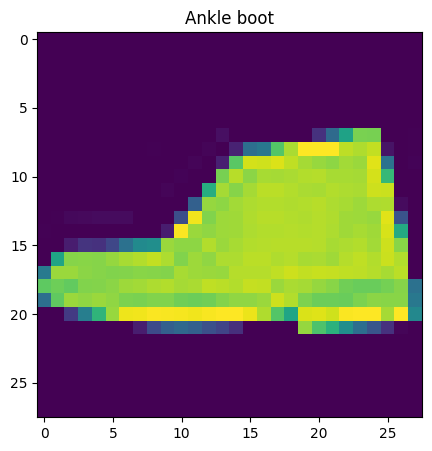

In [ ]:
idx = torch.randint(0, len(test_data), (1,)).item()
print(idx)
image, label = test_data[idx]
plt.figure(figsize=(5, 5))
plt.imshow(image.squeeze())
plt.title(test_data.classes[label])
num = model_2(image.unsqueeze(0).to(device))
c = torch.softmax(num, dim=1).argmax(dim=1).item()
print(test_data.classes[c])

In [ ]:
def make_predictions(model:torch.nn.Module,
                     datalist:list,
                     device:torch.device=device):
  pred_probs = []
  images = torch.stack(datalist, dim=0)
  model.eval()
  with torch.inference_mode():
    images = images.to(device)
    preds = model(images)
    preds_probs = torch.softmax(preds, dim=1)

  return preds_probs


In [ ]:
import numpy as np

In [ ]:
indices = np.random.randint(0, len(test_data), (5,))
images = []
labels = []
for i in indices:
  images.append(test_data[i][0])
  labels.append(test_data[i][1])

In [ ]:
preds_probs = make_predictions(model_2, images)

In [ ]:
cs = torch.argmax(preds_probs, dim=1)
cs == torch.tensor(labels).to(device)

tensor([ True,  True,  True,  True, False], device='cuda:0')

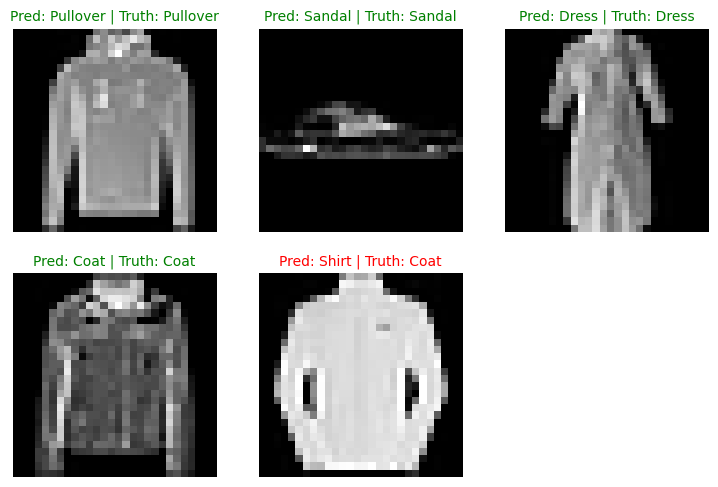

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(images):
  plt.subplot(nrows, ncols, i + 1)

  plt.imshow(sample.squeeze(), cmap='gray')

  pred_label = test_data.classes[cs[i]]

  truth_label = test_data.classes[labels[i]]

  title_text = f'Pred: {pred_label} | Truth: {truth_label}'

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)


In [ ]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/03_pytorch_computer_vision_model_2.pth')

In [ ]:
torch.save(model_2.state_dict(), MODEL_SAVE_PATH)
print(f'Save model to: {MODEL_SAVE_PATH}')

Save model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
#torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)

loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3401, device='cuda:0'),
 'model_acc': tensor(87.6897, device='cuda:0')}

In [ ]:
loaded_model_2_result = eval_model(loaded_model_2.to(device), test_dataloader, loss_fn, acc_fn = torchmetrics.Accuracy(task='multiclass', num_classes=10).to(device))

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
loaded_model_2_result

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3401, device='cuda:0'),
 'model_acc': tensor(87.6897, device='cuda:0')}

In [ ]:
torch.isclose(model_2_results['model_loss'],
              loaded_model_2_result['model_loss'],
              atol = 1e-08)

tensor(True, device='cuda:0')